# Linear Regression
### Notebook by [Kevin Huang](https://kevin8523.github.io/)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

***Set up dataset into a dataframe to practice ML***

In [2]:
# datasets
boston = load_boston()

In [3]:
# Set up data in a dataframe like a realworld problem
df = pd.DataFrame(data = boston.data)

In [4]:
# Name columns
df.columns = boston.feature_names

In [5]:
# Add Price feature >> Target or Y Variable
df["PRICE"] = boston.target

In [6]:
# Convert Chas to Categorical for practice
df['CHAS'] = df['CHAS'].replace([0], 'Charles River')
df['CHAS'] = df['CHAS'].replace([1], 'Tract Bounds River')

In [7]:
# Show values on a category
df["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

***Summary Statistics***

In [8]:
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,Charles River,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,Charles River,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,Charles River,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,Charles River,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,Charles River,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


***Missing Data***

In [23]:
## Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])

***Setup data for ML***

In [9]:
# Import Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
#ct.fit_transform(df)

In [33]:
ohe = OneHotEncoder()

df_ml = ohe.fit_transform(df[['CHAS']])
df_ml.get_feature_names())

SyntaxError: invalid syntax (<ipython-input-33-4084e25da46a>, line 4)

In [17]:
ohe = OneHotEncoder()
cat_ohe_step = (ohe.fit_transform()) # Reshape data to work on new Pandas ohe
cat_steps = [cat_si_steps, cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_cols = ['CHAS']
cat_transformers = [('cat', cat_ohe, cat_cols)]
ct = ColumnTransformer(transformers=cat_transformers)

In [167]:
# Split for train and test as vectors
# : for the list >> [row selection, column seleciton]
X = df.iloc[:, :-1].values # [:, :-1] >> [all rows, all columns except last one]
y = df.iloc[:, 13].values # all rows and just column 13

***Encoding Categorical Variable*** <br/>
Since it is NOT ordered, Use OneHotEncoder <br/>

In [157]:
# Encoding the Independent Variable after Vectorizing
# *** NOTE: Moves the encoded variable to the first column >> column0
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3]) #Column3 >> Orders categories by abc order
onehotencoder = OneHotEncoder(categorical_features = [3]) #Column3
X = onehotencoder.fit_transform(X).toarray()

//anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:351: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
//anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:373: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Double check how the OneHotEncoder labeled the categories <br/>
- Charles River == 1
- Tract River == 0

In [79]:
## Avoid Dummy Variable Trap
## Number of categories minus 1 >> i.e: for Sex just have 1, the constant term will include the other. 
## For Days in week >> 6
# X = X[:, 1:] #Since there are two categories, we dont need to remove any variables since there is only 1 variable

## Encoding the Dependent Variable
# labelencoder_y = LabelEncoder()
# y = labelencoder_y.fit_transform(y)

***Split the dataset: Train & test set for CV***

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 14)
(152, 14)
(354,)
(152,)


In [ ]:
## Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)"""

***Apply ML***

In [105]:
# Instantiate Model
lm = LinearRegression()

# Fit data to model
lm.fit(X_train, y_train)

# Predict 
y_pred = lm.predict(X_test)

In [115]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(mse)

30.69703770408881


***Visualize Data***

In [107]:
# Import Libraries
import matplotlib.pyplot as plt

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

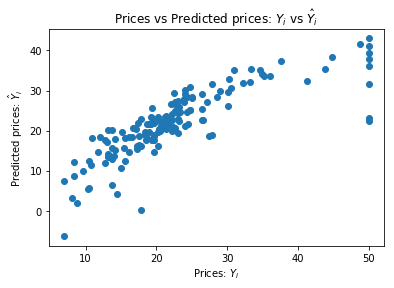

In [108]:
# Plot Visual
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")